In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Phân tích hồi quy 
Phần này sẽ phân tích hồi quy sự tương quan giữa biến phụ thuộc AQI index và các biến khác

In [2]:
df=pd.read_csv("processed_2020.csv")
df

,Date,Station name,AQI index,CO,Dew,Humidity,NO2,O3,PM10,PM2.5,Pressure,SO2,Temperature,Wind,Dominent pollutant
0,2020-01-01,Hạ Long,165.0,5.0,22.35,88.65,26.0,6.0,52.0,83.0,998.5,20.0,23.3,2.0,PM2.5
1,2020-01-01,Hà Nội,241.0,0.3,21.00,74.00,17.9,4.0,83.0,164.0,1011.5,4.0,24.5,2.8,PM2.5
2,2020-01-01,Hồ Chí Minh,161.0,4.0,24.00,78.00,10.0,7.0,22.0,74.0,1009.0,5.0,27.5,2.3,PM2.5
3,2020-01-01,Thừa Thiên Huế,63.0,5.0,23.50,83.00,4.0,11.0,13.0,18.0,1011.0,5.0,26.0,1.8,PM2.5
4,2021-01-01,Hạ Long,97.0,5.0,5.90,75.50,9.0,30.0,23.0,34.0,1011.2,20.0,13.2,2.0,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,2020-12-31,Hạ Long,107.0,5.0,7.60,68.50,13.0,24.0,34.0,38.0,1011.6,20.0,12.3,2.0,PM2.5
1820,2020-12-31,Hà Nội,81.0,8.0,2.00,38.00,14.2,5.7,28.0,93.0,1026.0,4.6,14.0,2.8,PM2.5
1821,2020-12-31,Hải Phòng,91.0,3.0,7.60,68.50,4.0,16.0,32.0,31.0,1011.6,2.0,12.3,2.0,PM2.5
1822,2020-12-31,Hồ Chí Minh,156.0,4.0,16.00,52.00,10.0,7.0,22.0,65.0,1010.0,5.0,25.5,3.8,PM2.5


In [3]:
df.columns

Index(['Date', 'Station name', 'AQI index', 'CO', 'Dew', 'Humidity', 'NO2',
       'O3', 'PM10', 'PM2.5', 'Pressure', 'SO2', 'Temperature', 'Wind',
       'Dominent pollutant'],
      dtype='object')

In [4]:
# df.drop(columns=['Date','Dominent pollutant'],inplace=True)
df.drop(columns=['Date','Dominent pollutant','Station name'],inplace=True)

Correlation coefficient giữa các biến độc lập

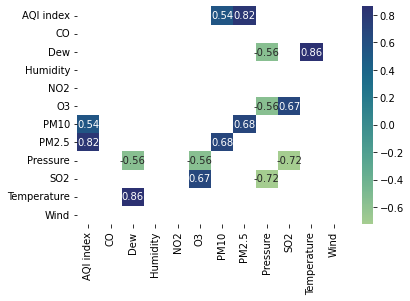

In [5]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = num_cols.corr()

# Sử dụng mask để chỉ hiển thị giá trị tuyệt đối lớn hơn hoặc bằng 0.5
mask =  (abs(corr_matrix) <= 0.5) | (abs(corr_matrix) == 1)

# Tạo heatmap và chỉ hiển thị các ô thỏa mãn điều kiện trong mask
sns.heatmap(corr_matrix, annot=True, cmap="crest", mask=mask)
plt.show()

Ta thấy giữa Dew và Temperature có mối quan hệ đồng biến mạnh với corr=0.86 nên ta sẽ bỏ bớt một trong 2 biến

### Phân tích đơn biến

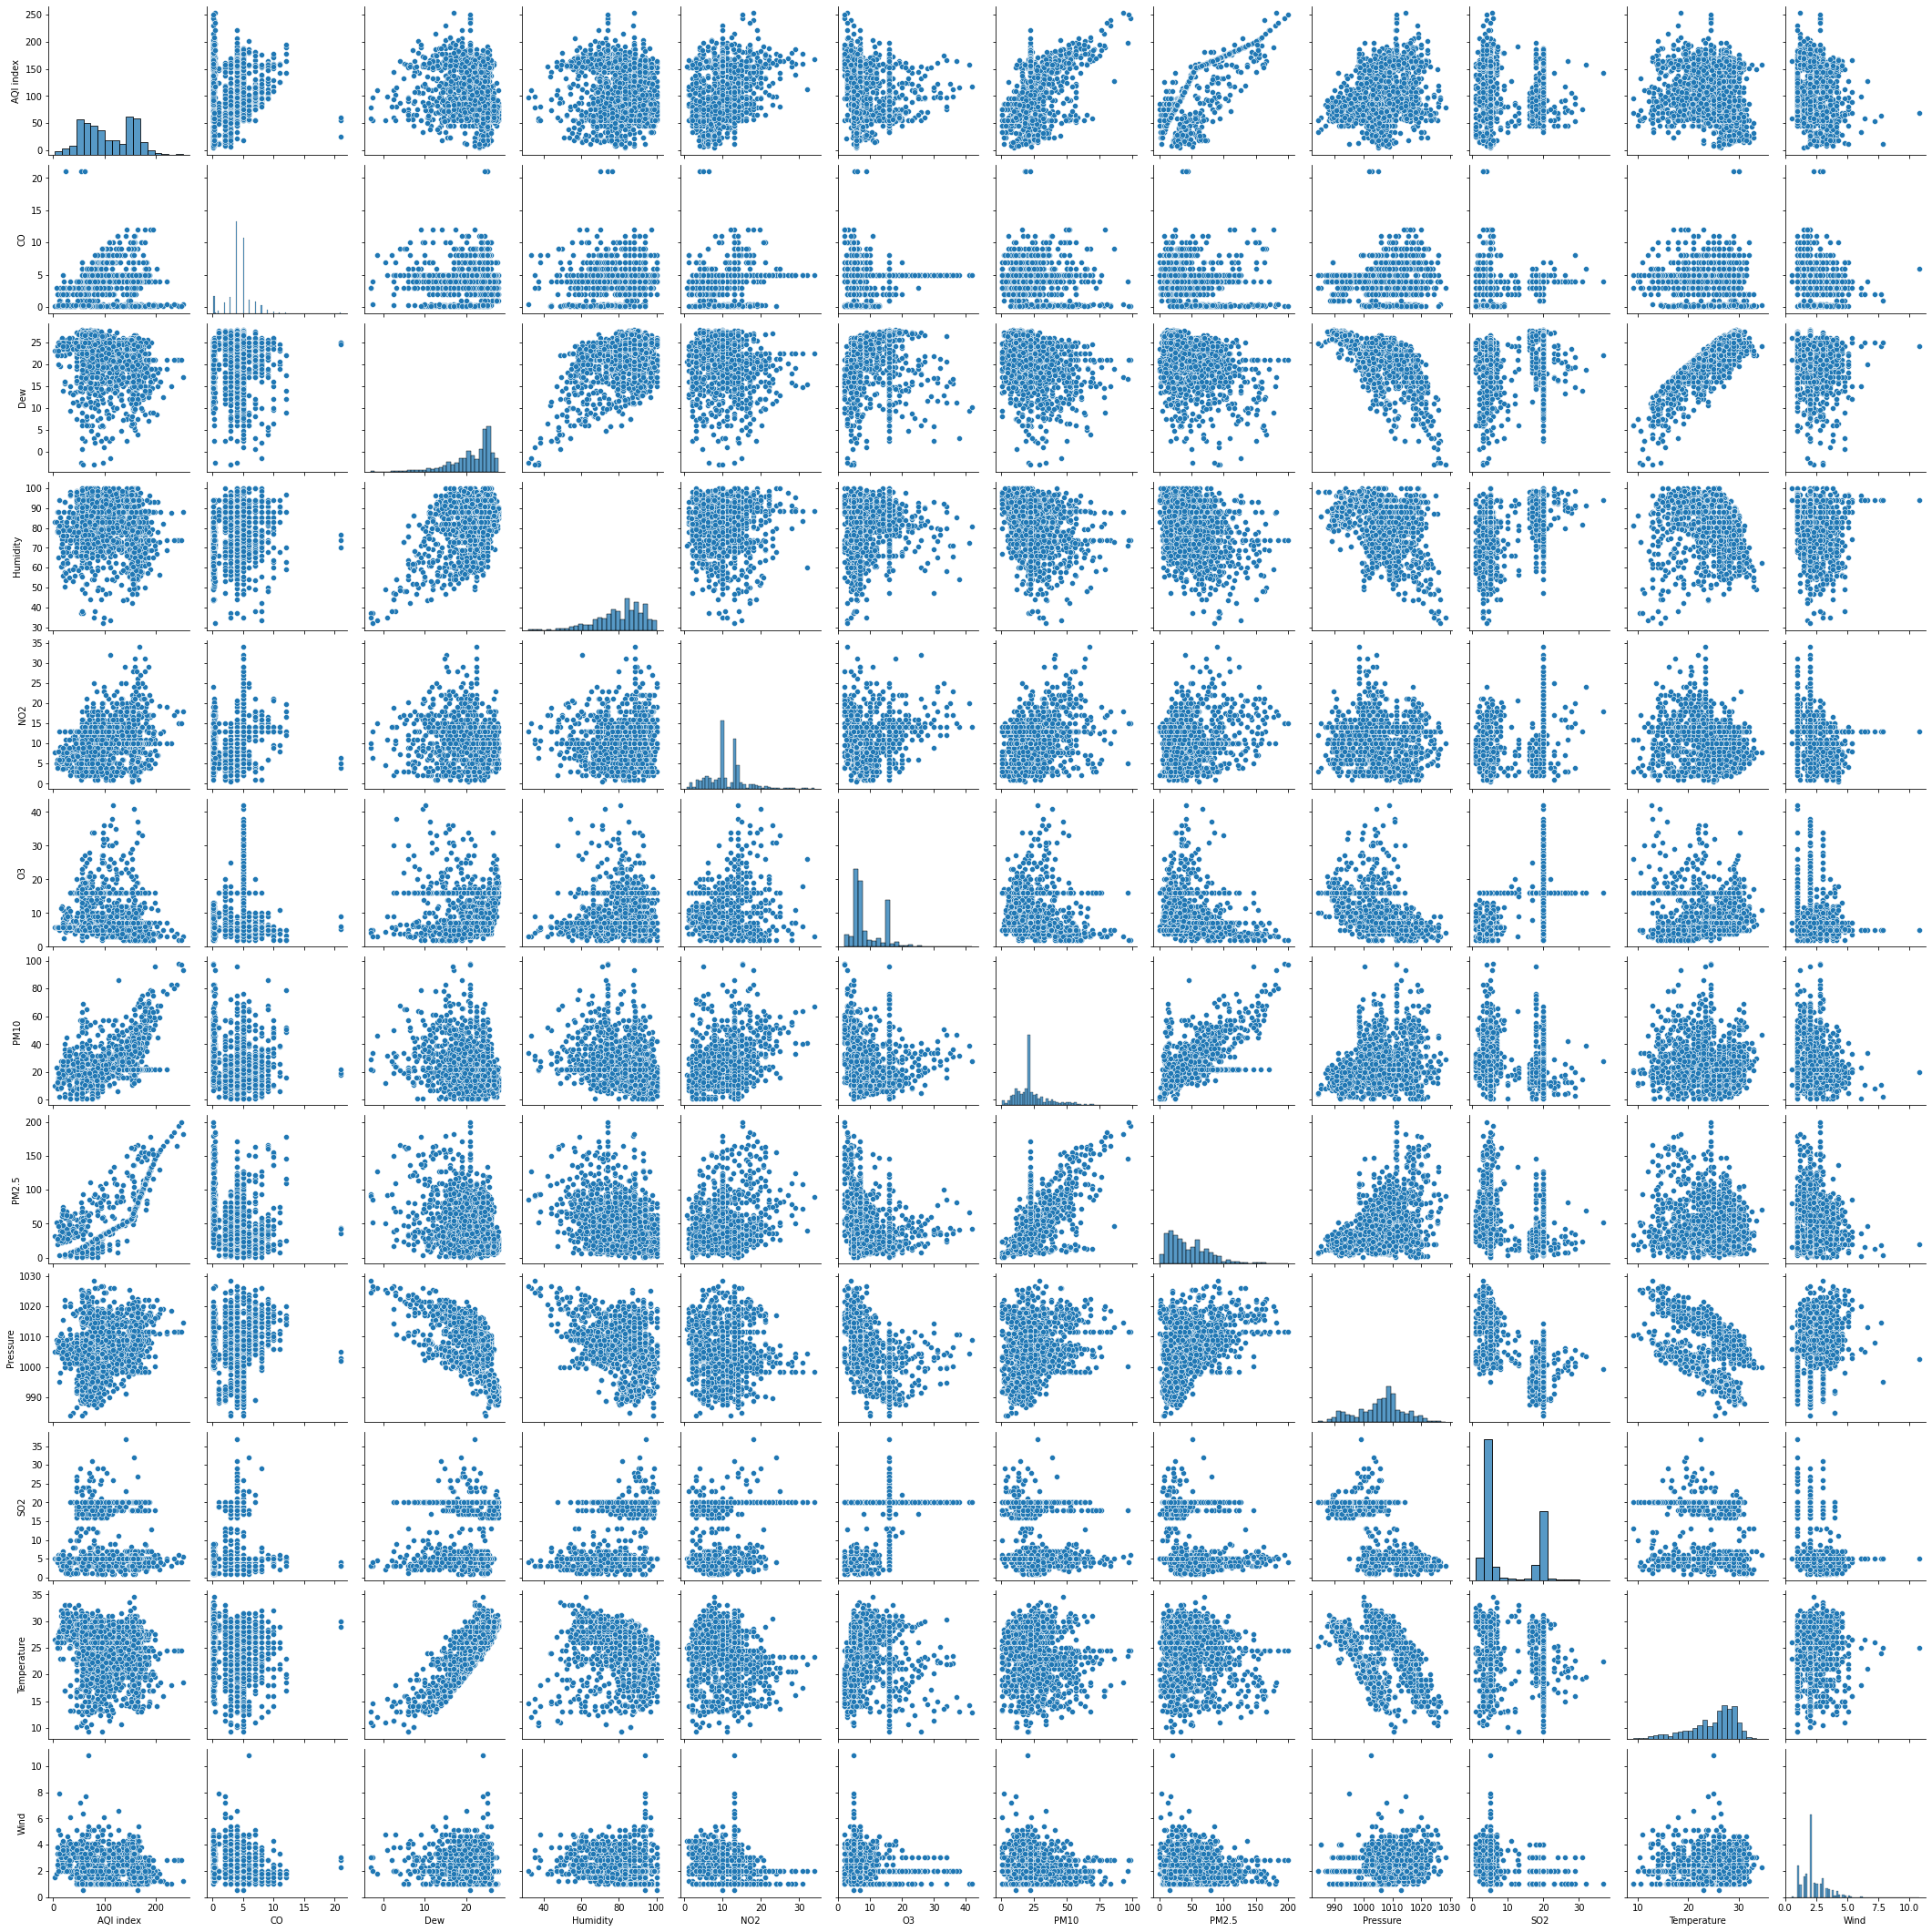

In [6]:
sns.pairplot(data=df)

In [7]:
cols=['CO', 'Dew', 'Humidity', 'NO2',
       'O3', 'PM10', 'PM2.5', 'Pressure', 'SO2', 'Temperature', 'Wind']
res=[]
for col in cols:
    X = df[col]
    y = df['AQI index']

    # Thêm cột intercept
    X = sm.add_constant(X)

    # Xây dựng và huấn luyện mô hình hồi quy tuyến tính
    model = sm.OLS(y, X)
    results = model.fit()
    summary=[col,results.params[1].round(decimals=4),results.rsquared.round(decimals=4),results.rsquared_adj.round(decimals=4),results.pvalues[1].round(decimals=4)]
    res.append(summary)
df_res = pd.DataFrame(res, columns=['Var','Coef', 'R-squared', 'Adjusted R-squared', 'p-values'])
df_res.sort_values('Adjusted R-squared',ascending=False)

,Var,Coef,R-squared,Adjusted R-squared,p-values
6,PM2.5,1.1720,0.6668,0.6666,0.0000
5,PM10,1.8871,0.2938,0.2934,0.0000
7,Pressure,2.0313,0.1190,0.1185,0.0000
8,SO2,-1.4399,0.0482,0.0477,0.0000
1,Dew,-1.8881,0.0391,0.0385,0.0000
4,O3,-1.5518,0.0345,0.0340,0.0000
3,NO2,1.7085,0.0261,0.0256,0.0000
2,Humidity,-0.6262,0.0239,0.0234,0.0000
9,Temperature,-1.3191,0.0163,0.0158,0.0000
10,Wind,-2.0356,0.0017,0.0012,0.0773


Nhìn vào kết quả ta thấy có 9 biến có ý nghĩa thống kê với p-value 0.05. Trong đó, PM2.5 là yếu tố có ảnh hưởng nhiều nhất đến AQI cụ thể là tương quan đồng biến.

### Phân tích đa biến

In [8]:
# Chuẩn bị dữ liệu
X = df.drop(['AQI index','Dew','NO2','PM10','Wind'], axis=1)
y = df['AQI index']

# Thêm cột intercept
X = sm.add_constant(X)

# Xây dựng và huấn luyện mô hình hồi quy tuyến tính
model = sm.OLS(y, X)
results = model.fit()

# Kiểm tra tóm tắt của mô hình
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AQI index   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     667.2
Date:                Thu, 13 Jul 2023   Prob (F-statistic):               0.00
Time:                        21:18:23   Log-Likelihood:                -8463.9
No. Observations:                1824   AIC:                         1.694e+04
Df Residuals:                    1816   BIC:                         1.699e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1463.2879    179.808     -8.138      0.000   -1815.941   -1110.635
CO              2.9950      0.282     10.602      0.000       2.441       3.549
Humidity        0.8016      0.062     13.030      0.000       0.681       0.922
O3              1.0292      0.151      6.826      0.000       0.734       1.325
PM2.5           1.2996      0.021     62.072      0.000       1.258       1.341
Pressure        1.3642      0.172      7.923      0.000       1.027       1.702
SO2             0.5489      0.171      3.202      0.001       0.213       0.885
Temperature     1.8167      0.205      8.865      0.000       1.415       2.219
==============================================================================
Omnibus:                      321.465   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              675.712
Skew:                          -1.022   Prob(JB):                    1.87e-147
Kurtosis:                       5.171   Cond. No.                     3.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Dựa đoán chất lượng không khí ở Hà Nội

In [9]:
df_HN=pd.read_csv("data_HN_2020_2023.csv")
df_HN.set_index('date', inplace=True)
df_HN.index = pd.to_datetime(df_HN.index)
df_HN.sort_index(inplace=True)
df_HN

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
date,,,,,,,
2020-01-01,153.0,65.0,5.0,25.0,4.0,15.0,203.0
2020-01-02,118.0,44.0,6.0,21.0,3.0,10.0,183.0
2020-01-03,59.0,44.0,6.0,21.0,3.0,12.0,153.0
2020-01-04,70.0,46.0,6.0,18.0,2.0,9.0,158.0
2020-01-05,66.0,47.0,7.0,17.0,2.0,9.0,156.0
...,...,...,...,...,...,...,...
2023-07-07,34.0,36.0,13.0,18.0,19.0,5.0,97.0
2023-07-08,35.0,39.0,13.0,26.0,19.0,6.0,99.0
2023-07-09,30.0,46.0,13.0,28.0,19.0,7.0,89.0


In [10]:
df_HN=df_HN.loc[:'2023-06-01']

In [11]:
df_HN.index[0]

Timestamp('2020-01-01 00:00:00')

In [12]:
df_HN.index[-1]

Timestamp('2023-06-01 00:00:00')

Dữ liệu bắt đầu từ ngày 2020-01-01 và kết thúc 2023-06-01

In [13]:
df_weekly_mean = df_HN.resample('W').mean()
df_weekly_mean

,PM2.5,PM10,O3,NO2,SO2,CO,AQI
date,,,,,,,
2020-01-05,93.200000,49.200000,6.000000,20.400000,2.800000,11.000000,170.600000
2020-01-12,64.142857,49.428571,5.857143,17.285714,3.857143,10.714286,158.142857
2020-01-19,94.142857,47.857143,7.857143,14.857143,4.428571,10.428571,174.428571
2020-01-26,71.000000,33.571429,12.714286,10.428571,2.571429,7.857143,143.428571
2020-02-02,103.000000,58.285714,12.285714,14.714286,3.571429,8.571429,171.571429
...,...,...,...,...,...,...,...
2023-05-07,77.285714,58.428571,28.571429,20.714286,17.714286,4.428571,159.000000
2023-05-14,54.285714,45.571429,29.000000,26.571429,18.142857,6.714286,134.571429
2023-05-21,92.714286,66.857143,68.428571,27.000000,18.285714,6.857143,182.857143


In [14]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf
from scipy import stats
from itertools import product
plt.rcParams["figure.figsize"] = (15,7)
plt.tight_layout()

<Figure size 1080x504 with 0 Axes>

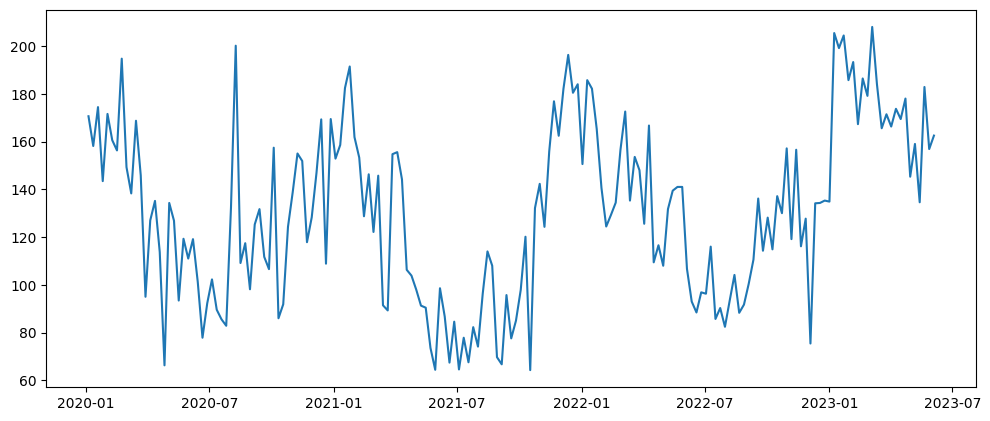

In [15]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(df_weekly_mean.AQI, label='AQI')

In [16]:
df_train=df_weekly_mean.copy()

In [17]:
df_weekly_mean.shape

(179, 7)

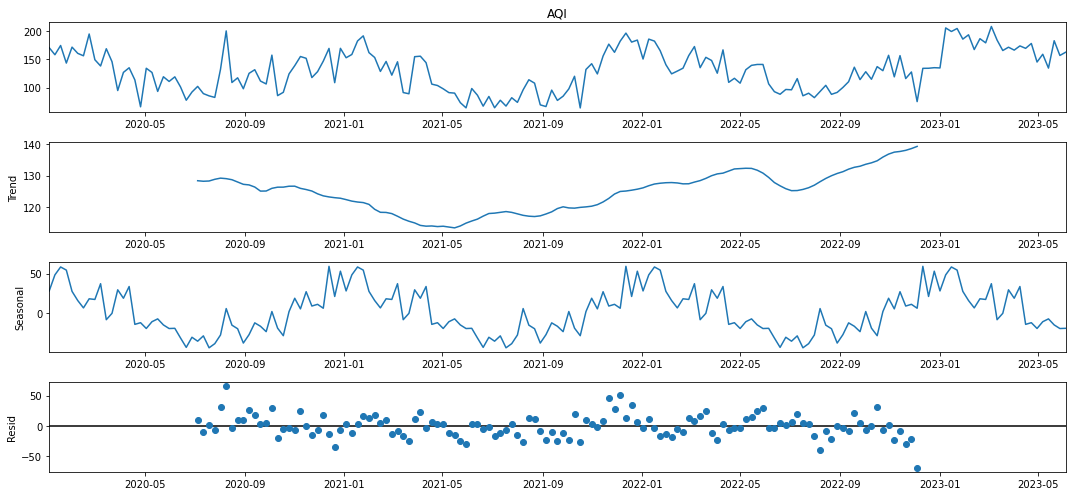

Dickey–Fuller test: p=0.112592


In [18]:
result = seasonal_decompose(df_train['AQI'])

# Hiển thị biểu đồ phân tích phân rã mùa vụ
result.plot()
plt.show()
# Kiểm tra tính dừng bằng Dickey–Fuller test
adf_result = adfuller(df_train['AQI'])
print("Dickey–Fuller test: p=%f" % adf_result[1])

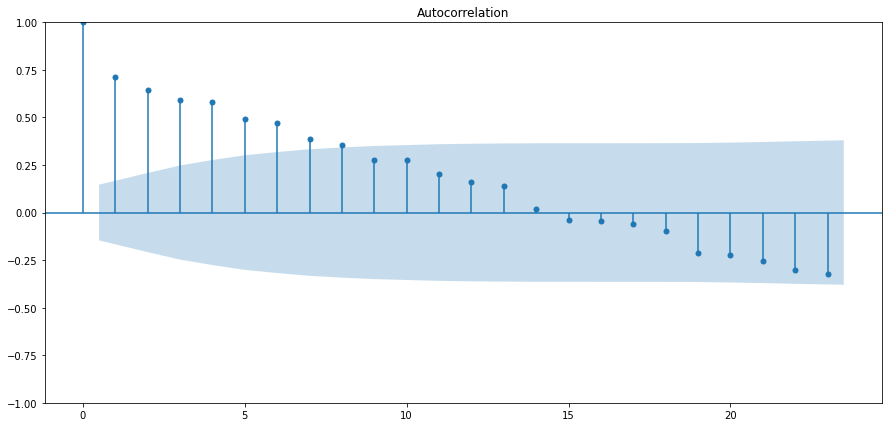

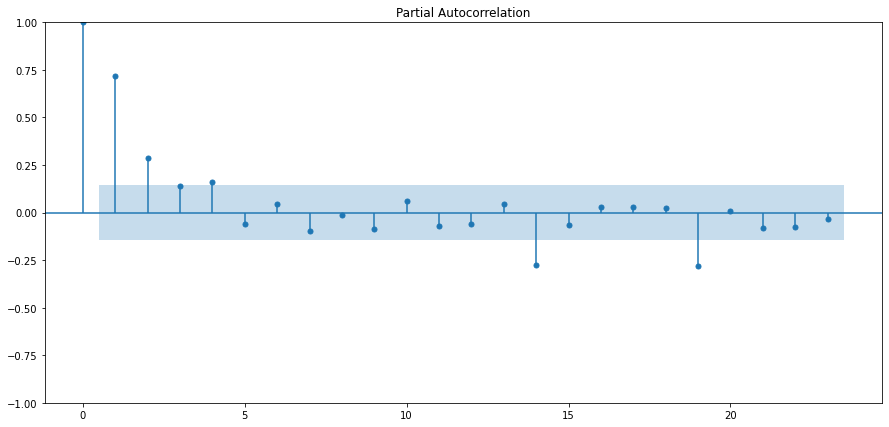

In [19]:
ax1 = plot_acf(df_train.AQI)
ax2 = plot_pacf(df_train.AQI)

Dickey–Fuller test: p=0.000000


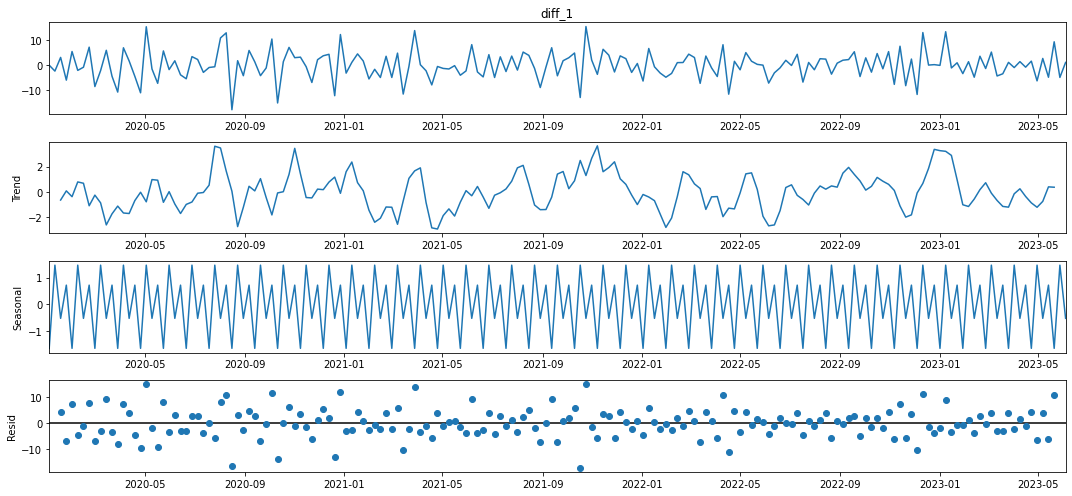

In [20]:
# Box-Cox Transformations
df_train['aqi_box'], lmbda = stats.boxcox(df_train.AQI)


# Seasonal differentiation
df_train['diff_1'] = df_train.aqi_box.diff()
df_train.loc[0:1,('diff_1')]=np.nanmean(df_train['diff_1'])
print("Dickey–Fuller test: p=%f" % adfuller(df_train.diff_1)[1])


# plt.tight_layout()
seasonal_decompose(df_train.diff_1,period=4).plot()
plt.show()

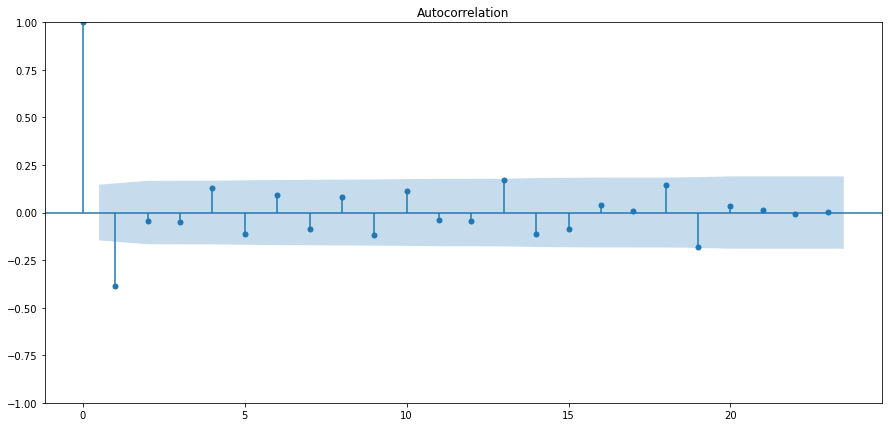

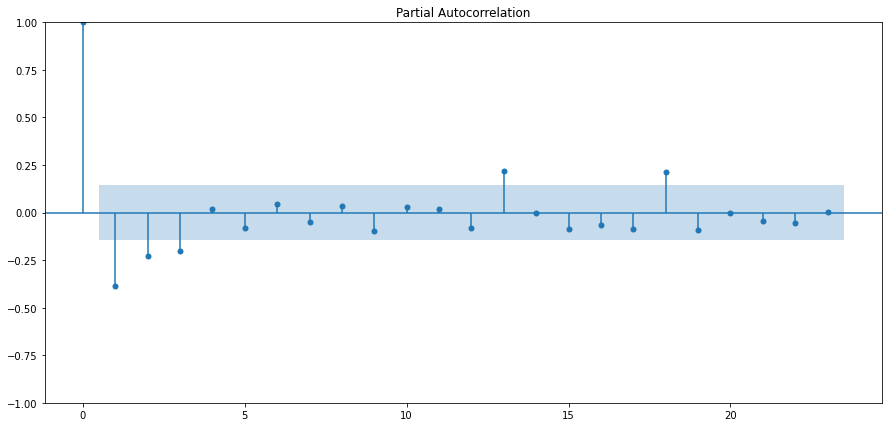

In [21]:
ax1 = plot_acf(df_train.diff_1)
ax2 = plot_pacf(df_train.diff_1)

In [22]:
# Initial approximation of parameters
ps = range(0, 3)
qs = range(0, 19)
d=1
parameters = product(ps, qs)
parameters_list = list(parameters)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model = SARIMAX(df_train.aqi_box, order=(param[0], d, param[1])).fit(disp=-1)
    except ValueError:
        print('bad parameter combination:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [23]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

   parameters          aic
41     (2, 3)  1084.187050
42     (2, 4)  1086.156708
1      (0, 1)  1086.943118
43     (2, 5)  1087.840201
2      (0, 2)  1088.630579
                               SARIMAX Results                                
Dep. Variable:                aqi_box   No. Observations:                  179
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -536.094
Date:                Thu, 13 Jul 2023   AIC                           1084.187
Time:                        21:19:19   BIC                           1103.278
Sample:                    01-05-2020   HQIC                          1091.929
                         - 06-04-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7086      0.068    -25.283     

In [24]:
train_arima=df_train.loc[:'2023-05-01']
test_arima=df_train.loc['2023-05-01':]

In [25]:
model = SARIMAX(train_arima.aqi_box, order=(2, 1,3))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                aqi_box   No. Observations:                  174
Model:               SARIMAX(2, 1, 3)   Log Likelihood                -522.471
Date:                Thu, 13 Jul 2023   AIC                           1056.942
Time:                        21:19:20   BIC                           1075.862
Sample:                    01-05-2020   HQIC                          1064.618
                         - 04-30-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7081      0.070    -24.290      0.000      -1.846      -1.570
ar.L2         -0.8621      0.067    -12.936      0.000      -0.993      -0.731
ma.L1          1.2586      1.260      0.999      0.318      -1.211       3.729
ma.L2         -0.0211      0.701     -0.030      0.976      -1.395       1.353
ma.L3         -0.5606      0.757     -0.741      0.459      -2.044       0.923
sigma2        23.9781     31.697      0.756      0.449     -38.148      86.104
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.33
Prob(Q):                              0.94   Prob(JB):                         0.31
Heteroskedasticity (H):               0.63   Skew:                             0.18
Prob(H) (two-sided):                  0.08   Kurtosis:                         3.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

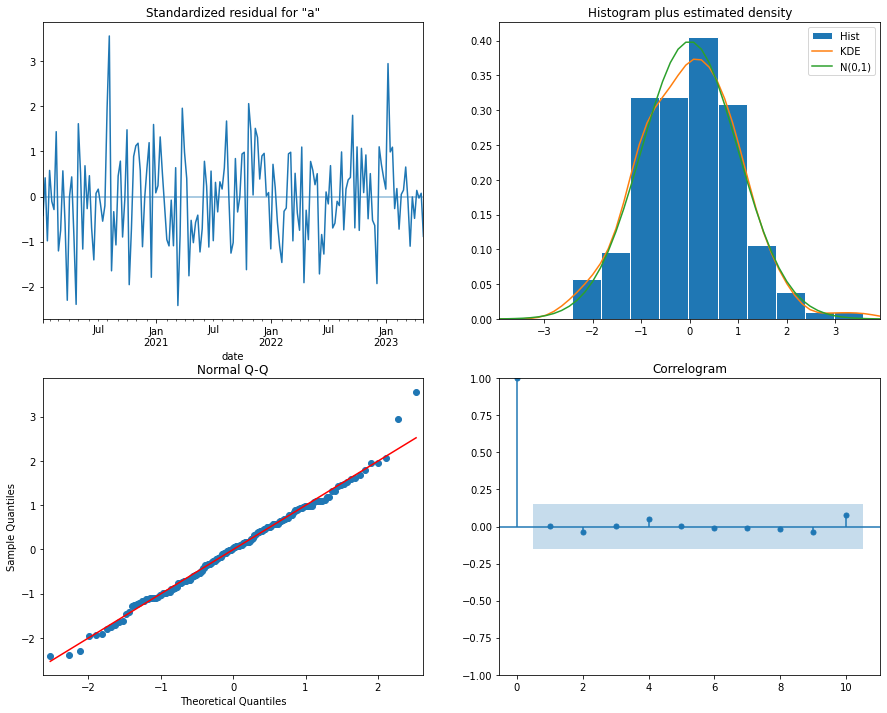

In [26]:
model.plot_diagnostics(figsize=(15, 12))
plt.show()

In [27]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

In [28]:
# Forecast
arima_pred  = model.predict(start=train_arima.shape[0],end=df_train.shape[0]-1).rename("ARIMA Predictions")
arima_pred=invboxcox(arima_pred,lmbda)
arima_pred

2023-05-07    166.108891
2023-05-14    157.876596
2023-05-21    166.218881
2023-05-28    159.058718
2023-06-04    164.077985
Freq: W-SUN, Name: ARIMA Predictions, dtype: float64

<AxesSubplot: xlabel='date'>

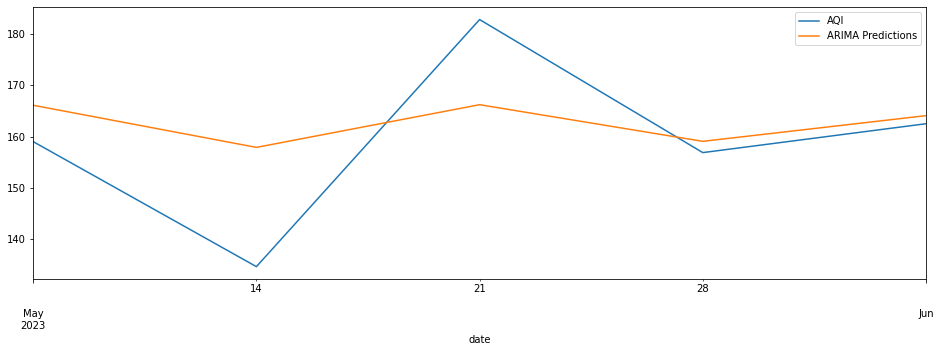

In [29]:
test_arima.AQI.plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True)

In [30]:
# Accuracy metrics
def _measure_metric(y, yhat):
  e = y-yhat
  mse=np.mean(e**2)
  rmse=np.sqrt(mse)
  mae=np.mean(np.abs(e))
  mape=abs(np.mean(e/y))

  print('Mean Square Error: {}'.format(mse))
  print('Root Mean Square Error: {}'.format(rmse))
  print('Mean Absolute Error: {}'.format(mae))
  print('Mean Absolute Percentage Error: {}'.format(mape))
  return mse, rmse, mae, mape

mse, rmse, mae, mape=_measure_metric(test_arima.AQI, arima_pred)

Mean Square Error: 175.56717326871836
Root Mean Square Error: 13.250176348589417
Mean Absolute Error: 10.166376142320065
Mean Absolute Percentage Error: 0.030129277341205806


#### Đánh giá mô hình
RMSE (Biên độ giao động của giá trị dự báo xung quanh giá trị thực tế): 13.25.

MAE (Trung bình sai số giữa giá trị dự báo và giá trị thực tế): 10.17.

MAPE (Sai số giữa giá trị dự báo so với giá trị thực tế): 3%.

### Dự đoán AQI trong tháng 6 và tháng 7 2023

<AxesSubplot: >

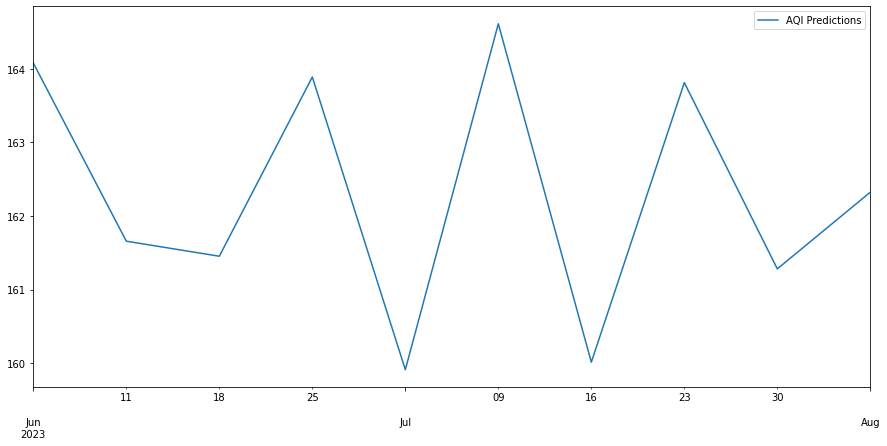

In [31]:
# Forecast
arima_pred  = model.predict(start=df_train.shape[0]-1,end=df_train.shape[0]+8).rename("AQI Predictions")
arima_pred=invboxcox(arima_pred,lmbda)
arima_pred.plot(legend = True)